In [7]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import numba


In [8]:
# Define a function that checks if a complex number is in the Mandelbrot set
@numba.njit
def mandelbrot(c, max_iter=100):
  z = 0
  for i in range(max_iter):
    z = z*z + c
    if abs(z) > 2:
      return False
  return True

In [9]:
# Define a function that returns a matrix of boolean values for a grid of complex numbers
@numba.njit
def mandelbrot_set(re, im, max_iter=100):
  rows = len(im)
  cols = len(re)
  result = np.zeros((rows, cols), dtype=np.bool_)
  for i in range(rows):
    for j in range(cols):
      c = complex(re[j], im[i])
      result[i, j] = mandelbrot(c, max_iter)
  return result

In [10]:
# Define a function that plots the Mandelbrot set for a given range of axes
def plot_mandelbrot(xmin, xmax, ymin, ymax, max_iter=100, cmap='hot'):
  re = np.linspace(xmin, xmax, 1000)
  im = np.linspace(ymin, ymax, 1000)
  mset = mandelbrot_set(re, im, max_iter)
  plt.figure(figsize=(10, 10), dpi=300)
  plt.imshow(mset.T, cmap=cmap, extent=[xmin, xmax, ymin, ymax])
  plt.xlabel('Real axis')
  plt.ylabel('Imaginary axis')
  plt.title(f'Mandelbrot set with {max_iter} iterations')
  plt.show()

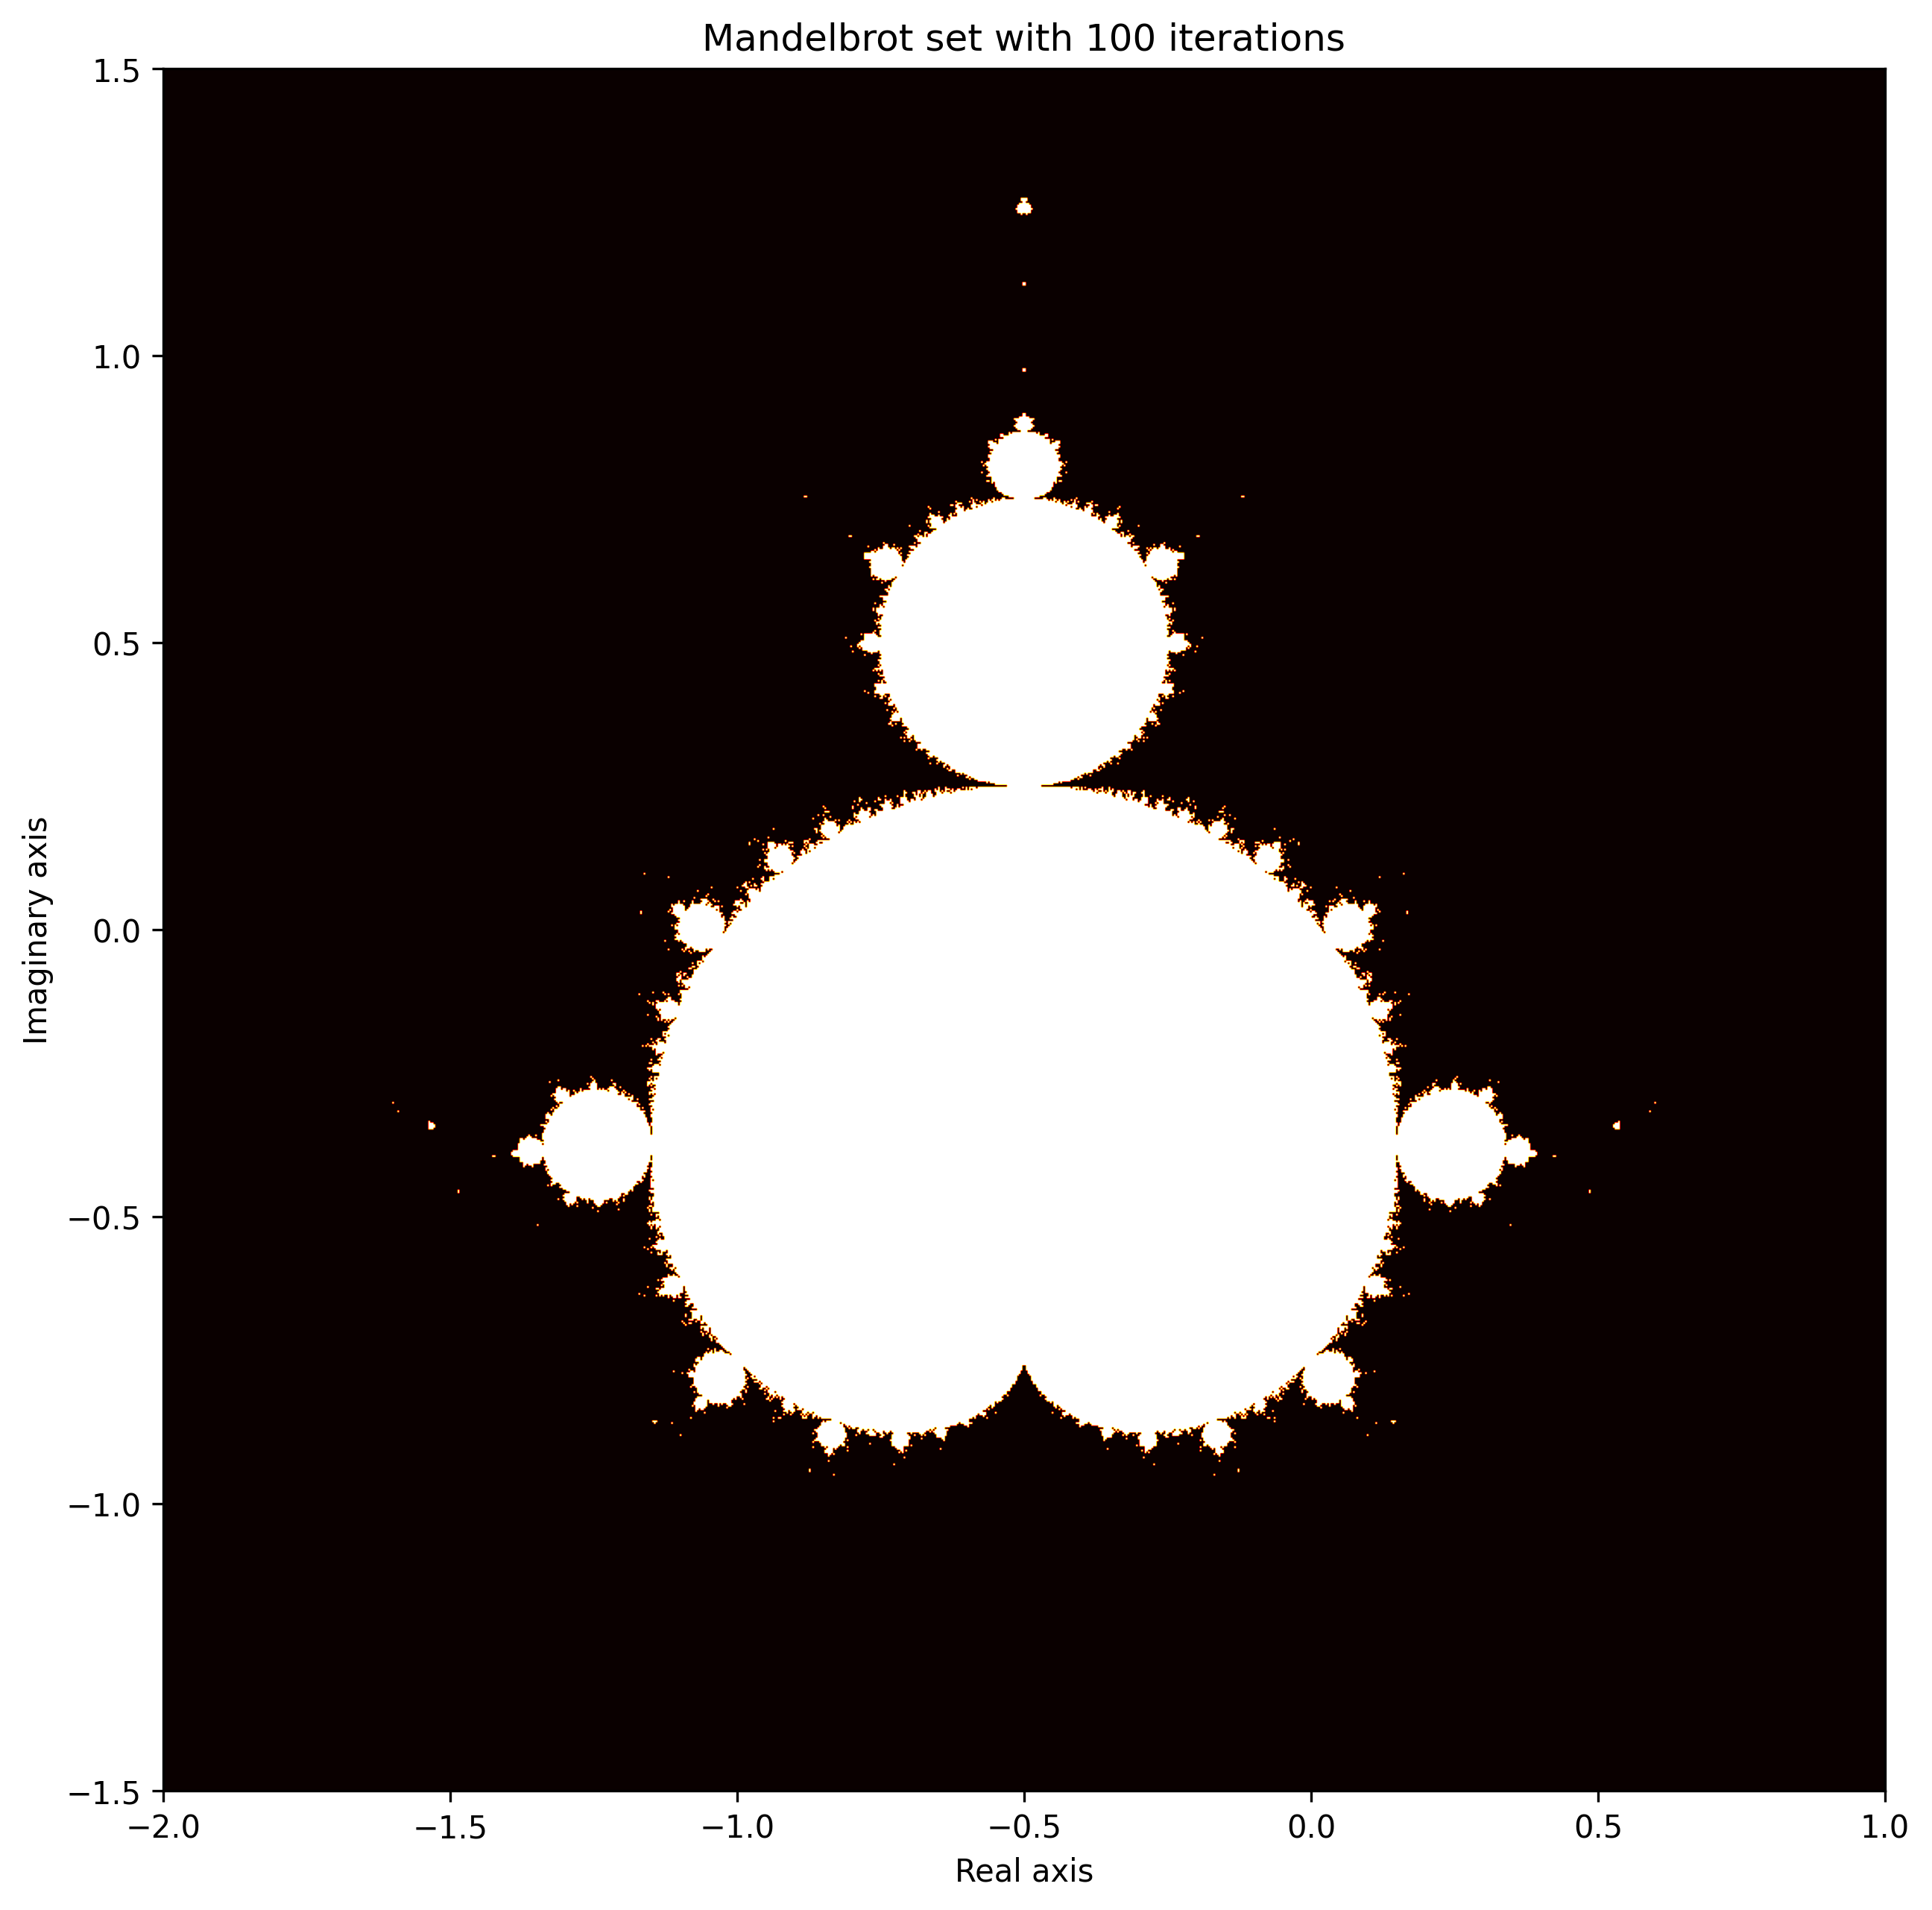

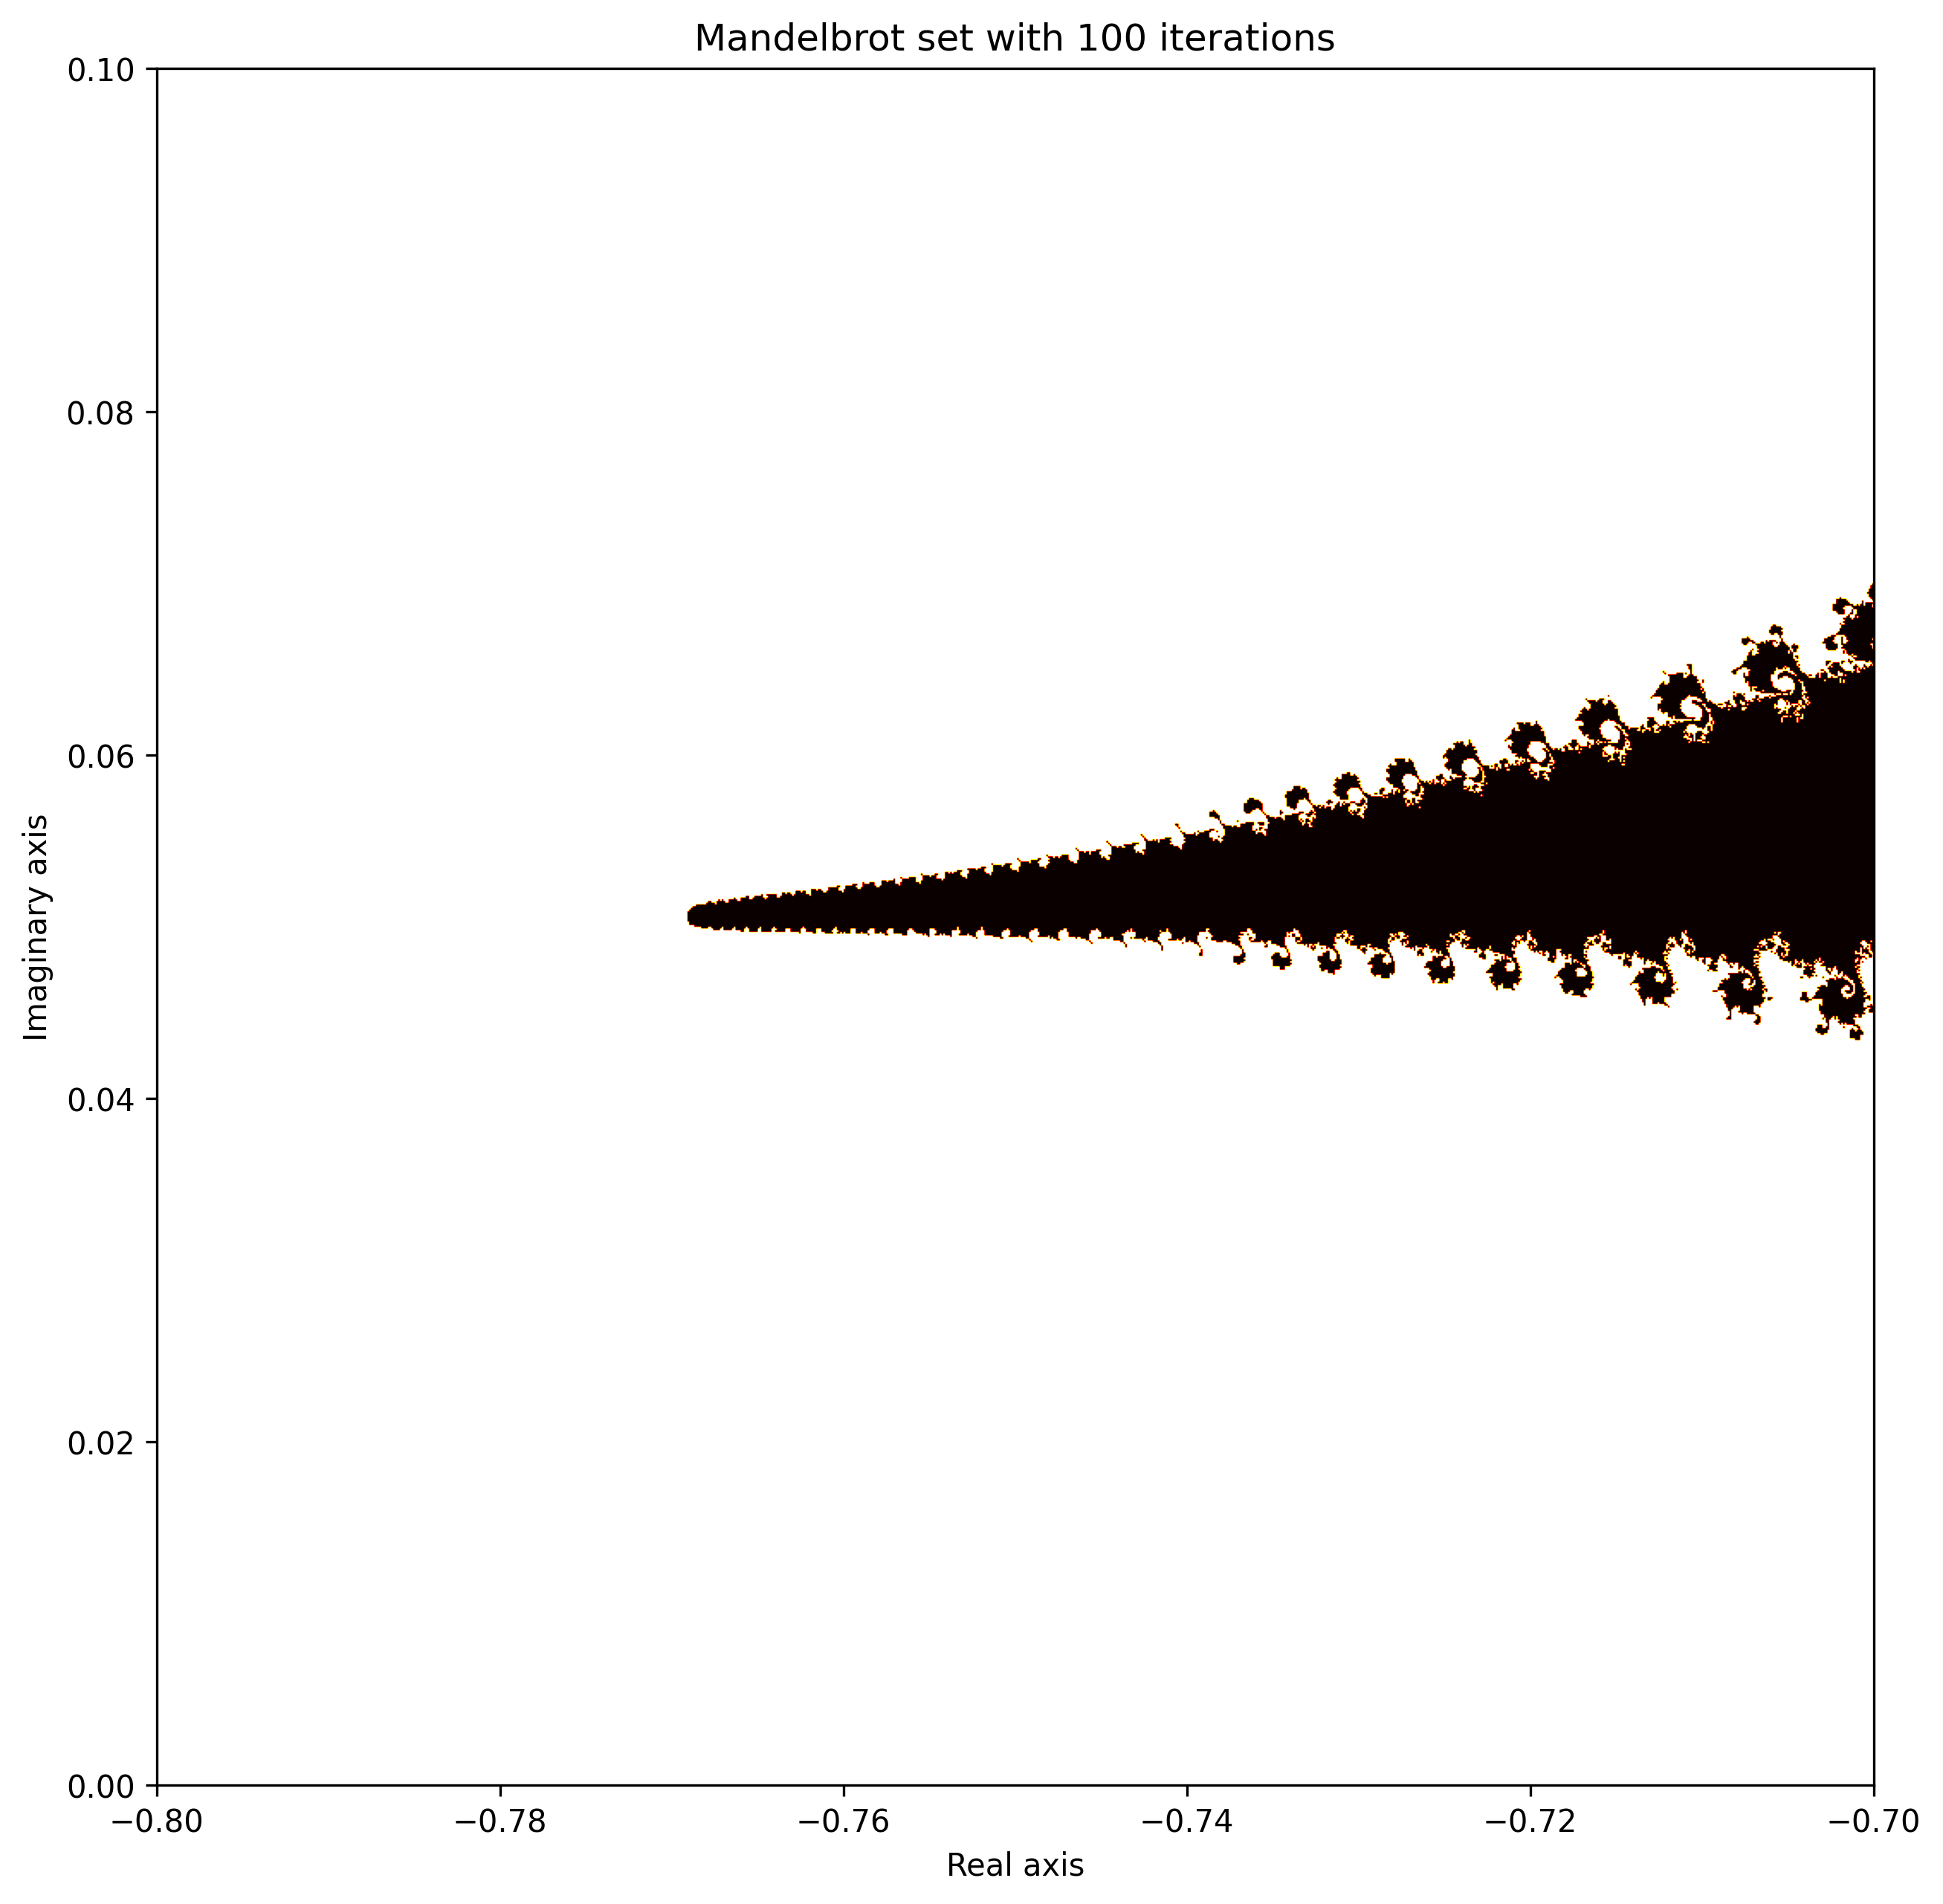

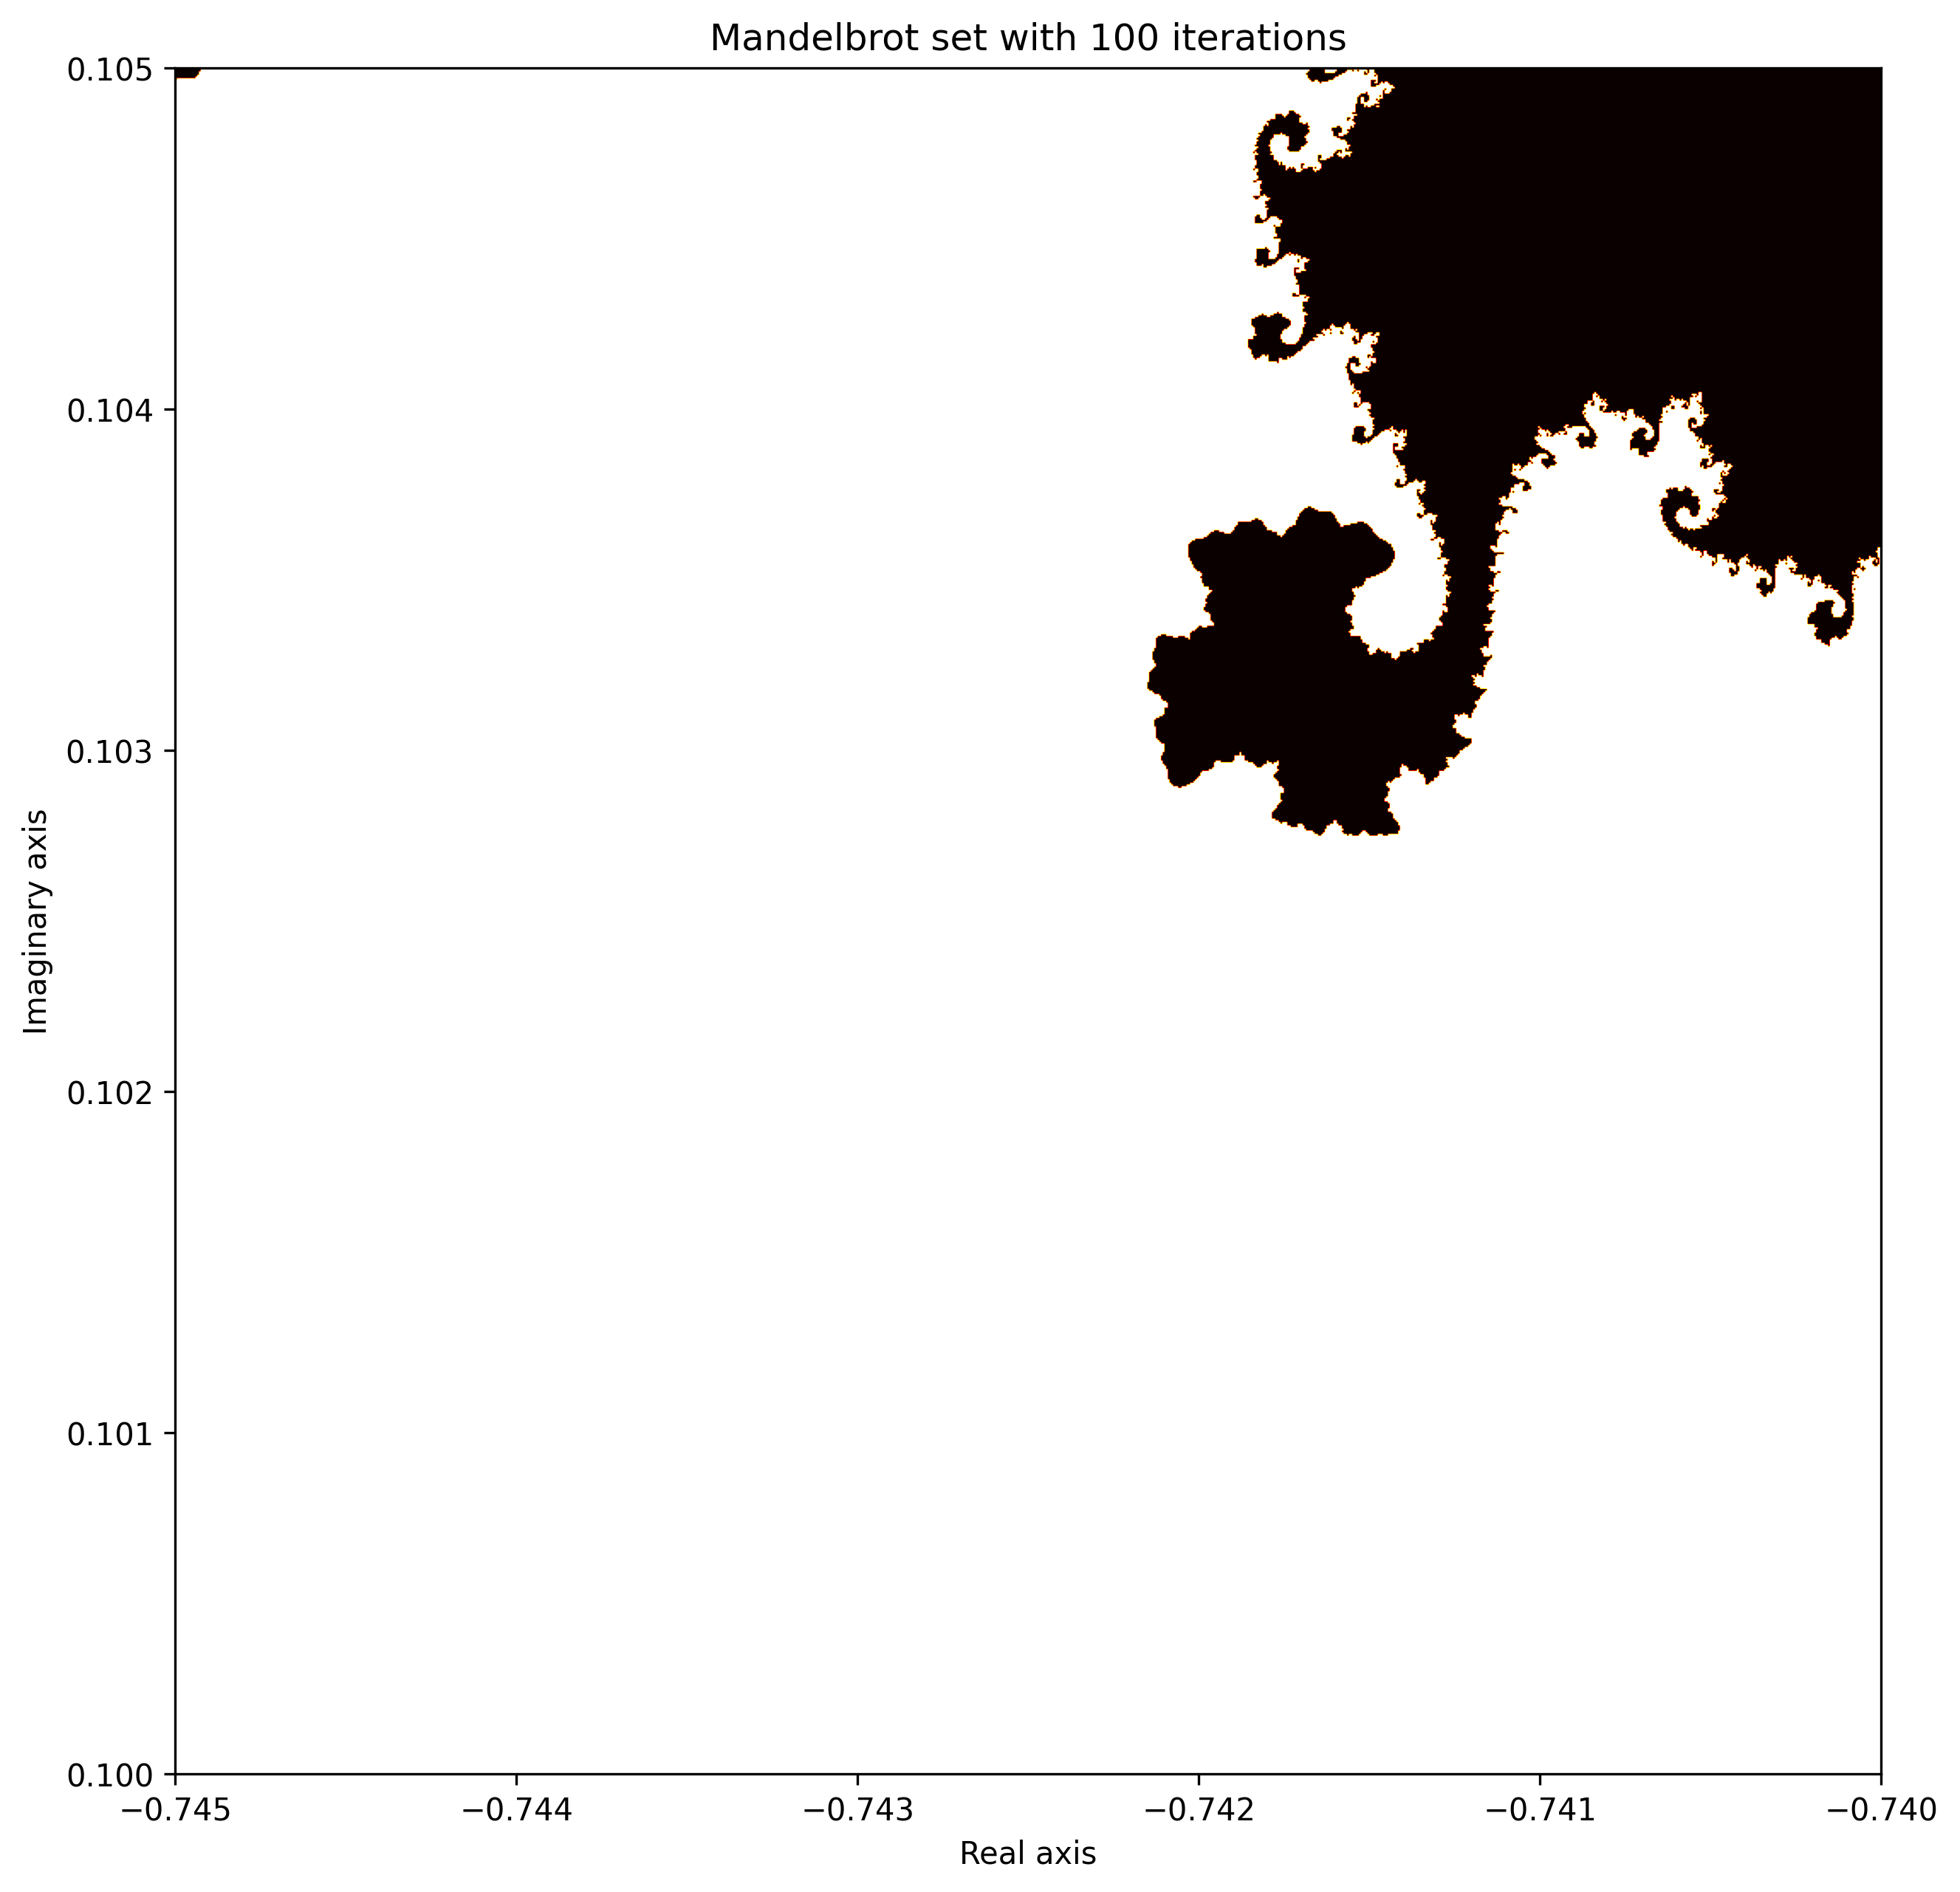

In [11]:
# Call the plot function with different values of the parameters to zoom in
plot_mandelbrot(-2, 1, -1.5, 1.5) # The whole set
plot_mandelbrot(-0.8, -0.7, 0, 0.1) # A zoomed-in region
plot_mandelbrot(-0.745, -0.74, 0.1, 0.105) # Another zoomed-in region